In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib import pyplot as plt
dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


SVM works best with **small datasets** and **when all you care about is getting the right answer and not how we got to that point**

In [240]:
ages = dataset['Age']
maxHR = dataset['MaxHR']
print("Ages.median: {}".format(ages.median()))
print("Ages.mean: {}".format(ages.mean()))
print("Ages.min: {}".format(ages.min()))
print("Ages.max: {}".format(ages.max()))
print("maxHR.median: {}".format(maxHR.median()))
print("maxHR.mean: {}".format(maxHR.mean()))
print("maxHR.min: {}".format(maxHR.min()))
print("maxHR.max: {}".format(maxHR.max()))

Ages.median: 54.0
Ages.mean: 53.510893246187365
Ages.min: 28
Ages.max: 77
maxHR.median: 138.0
maxHR.mean: 136.80936819172112
maxHR.min: 60
maxHR.max: 202


## To sort 

In [241]:
dataset.sort_values(by="Age")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
491,75,M,ASY,170,203,1,ST,108,N,0.0,Flat,1
541,76,M,NAP,104,113,0,LVH,120,N,3.5,Down,1
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
814,77,M,ASY,125,304,0,LVH,162,Y,0.0,Up,1


## To get several columns

In [242]:
dataset[['Age','MaxHR']]

,Age,MaxHR
0,40,172
1,49,156
2,37,98
3,48,108
4,54,122
...,...,...
913,45,132
914,68,141
915,57,115
916,57,174


## Show na,null values

In [243]:
df1 = dataset[dataset.isna().any(axis=1)]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [244]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['RestingECG'] = le.fit_transform(dataset['RestingECG'])
dataset['ChestPainType'] = le.fit_transform(dataset['ChestPainType'])
dataset['ST_Slope'] = le.fit_transform(dataset['ST_Slope'])
dataset['ExerciseAngina'] = le.fit_transform(dataset['ExerciseAngina'])
dataset['FastingBS']

0      0
1      0
2      0
3      0
4      0
      ..
913    0
914    1
915    0
916    0
917    0
Name: FastingBS, Length: 918, dtype: int64

## look for unique values

In [245]:
dataset['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

In [246]:
dataset['HeartDisease'].unique()

array([0, 1], dtype=int64)

In [247]:
dataset['Sex'].unique()

array([1, 0])

In [248]:
dataset['Cholesterol'].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

## How to find only zeros

In [249]:
dataset.loc[(dataset['Age'] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [250]:
dataset.loc[(dataset['Cholesterol'] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,0,115,0,0,1,93,1,0.0,1,1
294,32,1,3,95,0,1,1,127,0,0.7,2,1
295,61,1,0,105,0,1,1,110,1,1.5,2,1
296,50,1,0,145,0,1,1,139,1,0.7,1,1
297,57,1,0,110,0,1,2,131,1,1.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,0,122,0,0,1,120,0,0.5,2,1
515,63,1,2,130,0,1,2,160,0,3.0,1,0
518,48,1,2,102,0,1,2,110,1,1.0,0,1
535,56,1,0,130,0,0,0,122,1,1.0,1,1


## How to find only zeros in multiple places

In [251]:
dataset.loc[(dataset['Cholesterol'] == 0) | (dataset['RestingBP'] == 0)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,0,115,0,0,1,93,1,0.0,1,1
294,32,1,3,95,0,1,1,127,0,0.7,2,1
295,61,1,0,105,0,1,1,110,1,1.5,2,1
296,50,1,0,145,0,1,1,139,1,0.7,1,1
297,57,1,0,110,0,1,2,131,1,1.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,0,122,0,0,1,120,0,0.5,2,1
515,63,1,2,130,0,1,2,160,0,3.0,1,0
518,48,1,2,102,0,1,2,110,1,1.0,0,1
535,56,1,0,130,0,0,0,122,1,1.0,1,1


## Get length

In [252]:
len(dataset.loc[(dataset['Cholesterol'] == 0) | (dataset['RestingBP'] == 0)])

172

In [253]:
len(dataset)

918

## remove all the 0 lines

In [254]:
without_0 = dataset.loc[(dataset['Cholesterol'] != 0) & (dataset['RestingBP'] != 0)]
len(without_0)

746

**Now it has 172 less rows**

**Note**: & = and 
| =  or

## How to split your data, by all who have heart disease and all who don't

In [255]:
df0 = dataset[dataset.HeartDisease==0]
df1 = dataset[dataset.HeartDisease==1]
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,0,2,160,180,0,1,156,0,1.0,1,1
3,48,0,0,138,214,0,1,108,1,1.5,1,1
8,37,1,0,140,207,0,1,130,1,1.5,1,1
11,58,1,1,136,164,0,2,99,1,2.0,1,1
13,49,1,0,140,234,0,1,140,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,0,140,241,0,1,123,1,0.2,1,1
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1


In [256]:
print("df0 Len: {} ".format(len(df0)))
print("df0 age describe:\n\n {} ".format(df0.Age.describe()))
print("df1 Len: {} ".format(len(df1)))
print("df1 Len: {} ".format(len(df1)))

df0 Len: 410 
df0 age describe:

 count    410.000000
mean      50.551220
std        9.444915
min       28.000000
25%       43.000000
50%       51.000000
75%       57.000000
max       76.000000
Name: Age, dtype: float64 
df1 Len: 508 
df1 Len: 508 


## How to resample


In [257]:
from sklearn.utils import resample
has_HD_downsampled = resample(df1,replace=False, n_samples=100,random_state=42)
no_HD_downsampled = resample(df0,replace=False, n_samples=100,random_state=42)
print("hd len: {} ".format(len(has_HD_downsampled)))
print("no hd len: {} ".format(len(no_HD_downsampled)))

hd len: 100 
no hd len: 100 


## How to merge

In [258]:
merged = pd.concat([has_HD_downsampled, no_HD_downsampled])
len(merged)

200

Text(0.5, 0, 'age')

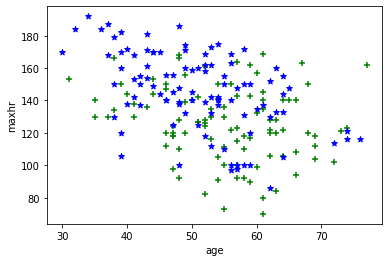

In [259]:
plt.scatter(has_HD_downsampled['Age'],has_HD_downsampled['MaxHR'],color="green",marker="+")
plt.scatter(no_HD_downsampled['Age'],no_HD_downsampled['MaxHR'],color="blue",marker="*")
plt.ylabel('maxhr')
plt.xlabel('age')

Text(0.5, 0, 'age')

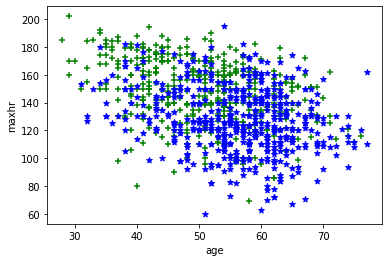

In [260]:
plt.scatter(df0['Age'],df0['MaxHR'],color="green",marker="+")
plt.scatter(df1['Age'],df1['MaxHR'],color="blue",marker="*")
plt.ylabel('maxhr')
plt.xlabel('age')

len(x_train):734
len(y_train):734
len(x_test):184
len(y_test):184
Model score: 0.8695652173913043 
              precision    recall  f1-score   support

HeartDisease       0.90      0.79      0.84        82
         Age       0.85      0.93      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

0.8878504672897195
0.8695652173913043


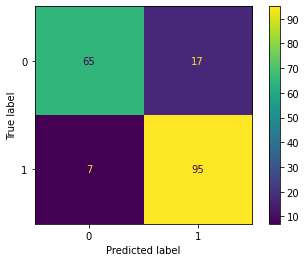

In [268]:
# x = dataset[["Age","Cholesterol"]]
x = dataset.iloc[:,0:11]
y = dataset.HeartDisease

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("len(x_train):{}".format(len(x_train)))
print("len(y_train):{}".format(len(y_train)))
print("len(x_test):{}".format(len(x_test)))
print("len(y_test):{}".format(len(x_test)))

from sklearn.svm import SVC
from sklearn.preprocessing import scale

x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)
model = SVC(C=0.5,gamma=0.1,kernel='rbf',random_state=42)
model.fit(x_train_scaled, y_train)

print("Model score: {} ".format(model.score(x_test_scaled,y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test_scaled),
	target_names=["HeartDisease","Age"]))

from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(x_test_scaled)

print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

from sklearn.metrics import f1_score,accuracy_score
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

In [262]:
param_grid = [{'C': [0.5, 1, 10, 100], 'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']} ]
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy')
optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}


## seeing merged result

x_train: 160
x_test: 40
Score: 0.8 
              precision    recall  f1-score   support

HeartDisease       0.89      0.74      0.81        23
         Age       0.71      0.88      0.79        17

    accuracy                           0.80        40
   macro avg       0.80      0.81      0.80        40
weighted avg       0.82      0.80      0.80        40

0.7894736842105262
0.8


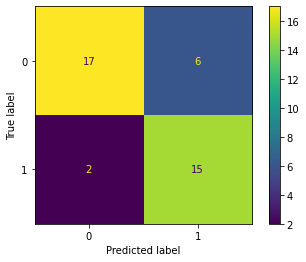

In [276]:
x = merged.iloc[:,0:11]
y = merged.HeartDisease

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print("x_train: {}".format(len(x_train)))
print("x_test: {}".format(len(x_test)))

x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)
model = SVC(C=0.5,gamma=0.1,kernel='rbf', random_state=42)
model.fit(x_train_scaled, y_train)

print("Score: {} ".format(model.score(x_test_scaled,y_test)))
print(classification_report(y_test, model.predict(x_test_scaled),
	target_names=["HeartDisease","Age"]))

y_pred = model.predict(x_test_scaled)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


## Let's do our best to optimize 

In [273]:
param_grid = [{'C': [0.5, 1, 10, 100], 'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']} ]
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy')
optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
